In [1]:
import pandas as pd
import numpy as np

In [2]:
gtalk = pd.read_csv("Zfone.csv")

In [3]:
gtalk.head()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,min_bpktl,mean_bpktl,max_bpktl,std_bpktl,min_fiat,mean_fiat,...,mean_biat,max_biat,std_biat,duration,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,class
0,40,55,123,33,40,136,414,185,547,196970,...,274569,703487,375882,984851,6,6,335,4,546,ZFONE
1,40,73,161,58,52,150,249,139,228,98243,...,161425,161425,0,294730,6,4,293,2,301,ZFONE
2,40,66,161,53,40,94,247,101,294,51030,...,68549,121763,62154,286660,6,5,333,4,379,ZFONE
3,40,97,266,92,40,320,1359,506,308,92852,...,103912,445511,158869,821078,6,9,880,8,2565,ZFONE
4,40,237,1211,477,40,673,1500,722,207,38775,...,39589,121720,56267,268906,6,6,1423,6,4038,ZFONE


In [4]:
data = gtalk[['min_fpktl', 'mean_fpktl', 'max_fpktl', 'std_fpktl']]

In [5]:
col = (data['std_fpktl']>30).astype(np.int64)
col.value_counts(normalize=True).round(2)

0    0.65
1    0.35
Name: std_fpktl, dtype: float64

In [6]:
data['class'] = col

C:\Users\PC16CA~1\AppData\Local\Temp/ipykernel_6196/903684849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['class'] = col


In [7]:
data["class"].value_counts()
data.head()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,class
0,40,55,123,33,1
1,40,73,161,58,1
2,40,66,161,53,1
3,40,97,266,92,1
4,40,237,1211,477,1


In [8]:
data.shape

(29961, 5)

In [9]:
data.describe()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,class
count,29961.000000,29961.000000,29961.000000,29961.000000,29961.000000
mean,45.318614,98.939221,382.767765,83.391609,0.346617
std,14.698224,72.157685,462.879571,138.376590,0.475901
min,40.000000,40.000000,56.000000,0.000000,0.000000
25%,40.000000,48.000000,116.000000,12.000000,0.000000
50%,40.000000,57.000000,196.000000,24.000000,0.000000
75%,40.000000,145.000000,287.000000,48.000000,1.000000
max,196.000000,461.000000,1500.000000,724.000000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

<AxesSubplot:ylabel='mean_bpktl'>

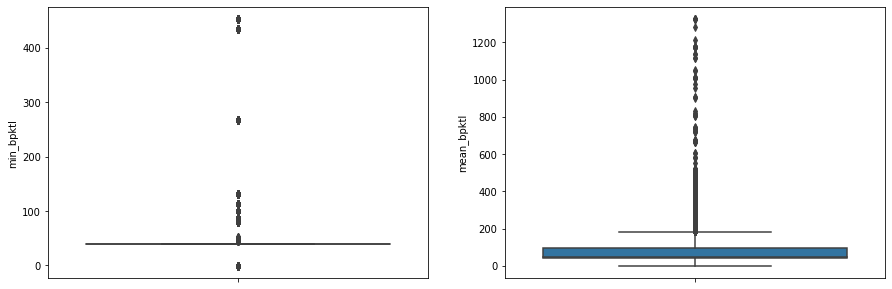

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y = gtalk['min_bpktl'])

plt.subplot(1,2,2)
sns.boxplot(y = gtalk['mean_bpktl'])

e:\softwares\python setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


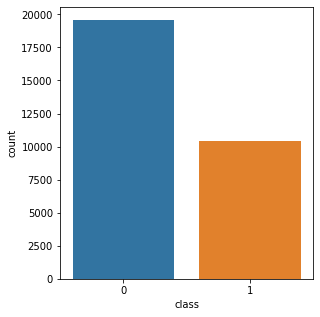

In [12]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(data['class'])
plt.show()

e:\softwares\python setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
e:\softwares\python setup\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


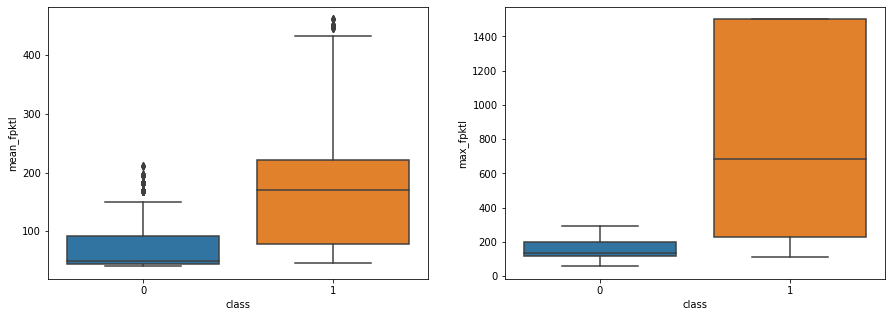

In [13]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data["class"], data['mean_fpktl'])\

plt.subplot(1,2,2)
sns.boxplot(data["class"], data["max_fpktl"])
plt.show()

In [14]:
data.isnull().sum()

min_fpktl     0
mean_fpktl    0
max_fpktl     0
std_fpktl     0
class         0
dtype: int64

In [15]:
Q1, Q3 = data['min_fpktl'].quantile([.25,.75])
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 - 1.5*(IQR)

In [16]:
UL

40.0

In [17]:
df = data[data["min_fpktl"]>UL]
df

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,class
31,56,56,56,0,0
33,56,56,56,0,0
34,112,112,112,0,0
46,56,56,56,0,0
48,56,56,56,0,0
...,...,...,...,...,...
29948,48,50,116,10,0
29952,49,149,291,24,0
29956,48,104,136,25,0
29957,48,50,116,10,0


In [18]:
df["min_fpktl"]

31        56
33        56
34       112
46        56
48        56
        ... 
29948     48
29952     49
29956     48
29957     48
29960     49
Name: min_fpktl, Length: 6396, dtype: int64

In [19]:
data.shape

(29961, 5)

In [20]:
data["min_fpktl"] = np.where(data["min_fpktl"]> UL, UL, data["min_fpktl"])

C:\Users\PC16CA~1\AppData\Local\Temp/ipykernel_6196/2084863303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["min_fpktl"] = np.where(data["min_fpktl"]> UL, UL, data["min_fpktl"])


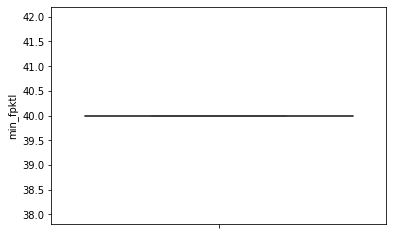

In [21]:
sns.boxplot(y = data["min_fpktl"])
plt.show()

In [22]:
data.head()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,class
0,40.0,55,123,33,1
1,40.0,73,161,58,1
2,40.0,66,161,53,1
3,40.0,97,266,92,1
4,40.0,237,1211,477,1


In [23]:
 data = pd.get_dummies(data , drop_first = True )

In [24]:
data.head()

,min_fpktl,mean_fpktl,max_fpktl,std_fpktl,class
0,40.0,55,123,33,1
1,40.0,73,161,58,1
2,40.0,66,161,53,1
3,40.0,97,266,92,1
4,40.0,237,1211,477,1



# MODEL 01


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = data.drop('class', axis = 1)
y = data["class"]

In [27]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42, stratify = y)

In [28]:
y_train.value_counts(normalize=True).round(2)
y_test.value_counts(normalize=True).round(2)

0    0.65
1    0.35
Name: class, dtype: float64

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression()

In [31]:
model.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_pre = model.predict(x_test)

In [33]:
y_pre[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [34]:
y_test.head()

6458     0
21289    1
19799    0
27437    0
4988     0
Name: class, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pre)

array([[5873,    0],
       [   0, 3116]], dtype=int64)

# MODEL 2

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size = 0.2, random_state = 42, stratify = y)

In [38]:
model2 = LogisticRegression()

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
# sm = SMOTE(random_state = 42, sampling_strategy = 0.75)
sm = SMOTE(random_state = 42)
x1,y1 = sm.fit_resample(x_train, y_train)

In [41]:
model2.fit(x1,y1)

LogisticRegression()

In [42]:
y_pre = model2.predict(x_test)

In [43]:
y_pre[:5]

array([1, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test.head()

24319    1
16165    1
18471    0
462      0
10415    0
Name: class, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pre)

array([[3916,    0],
       [   0, 2077]], dtype=int64)

In [46]:
(3916+2077)/ (3916+2077+0+0)

1.0